# 1. Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Package imports
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

# importing helper functions from other notebook
from ipynb.fs.full.utils import plot_decision_boundary, generate_planar_dataset

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 100


np.random.seed(42) # set a seed so that the results are consistent

# 2. Data generation, processing and visualization

## 2.1 Data generation

In [3]:
m_samples = 500
X_raw, Y_raw = generate_planar_dataset(m_samples)

print("X shape (features, samples):", X_raw.shape)
print("Y shape (features, samples):", Y_raw.shape)


X shape (features, samples): (2, 500)
Y shape (features, samples): (1, 500)


## 2.2 Train/test (80/20) split of data

In [4]:
# Shuffle the data
random_index = np.random.permutation(m_samples)
X_raw = X_raw[:,random_index]
Y_raw = Y_raw[:,random_index]

In [5]:
# Train/test split - 80/20
m = Y_raw.shape[1]
ixx = int(m*0.8)
train_X = X_raw[:, :ixx]
train_Y = Y_raw[:, :ixx]
test_X = X_raw[:, ixx:] 
test_Y = Y_raw[:, ixx:]

## 2.3 Visualize training and test data

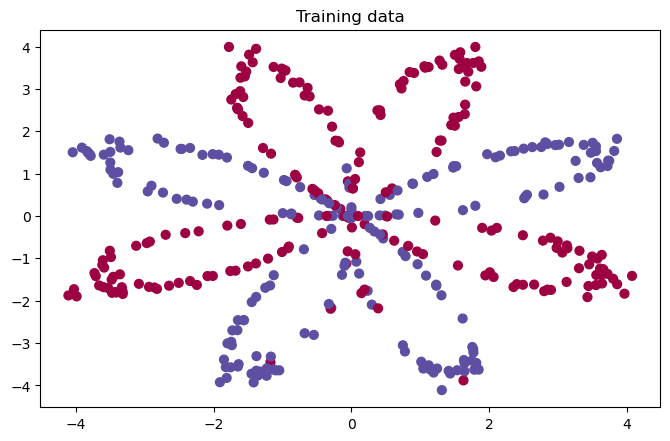

In [6]:
# Visualize the data:
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, marker="o", cmap=plt.cm.Spectral);
plt.title("Training data")
plt.show()

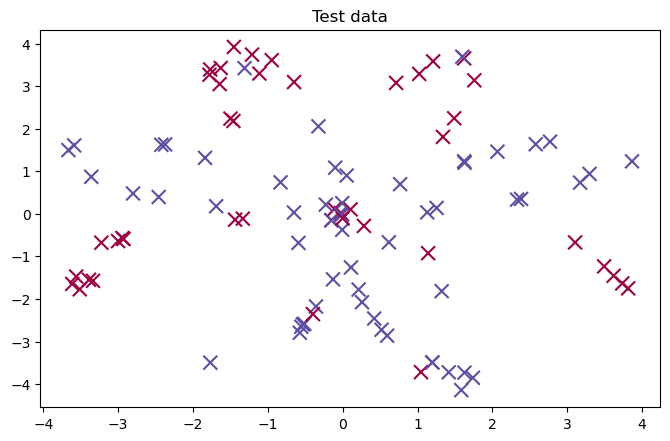

In [7]:
plt.scatter(test_X[0, :], test_X[1, :], c=test_Y, s=100, marker="x", cmap=plt.cm.Spectral);
plt.title("Test data")
plt.show()

## 2.4 Plot result of Logistic Regression

In [8]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV(scoring="accuracy");
clf.fit(train_X.T, train_Y.ravel());

Text(0.5, 1.0, 'Logistic Regression')

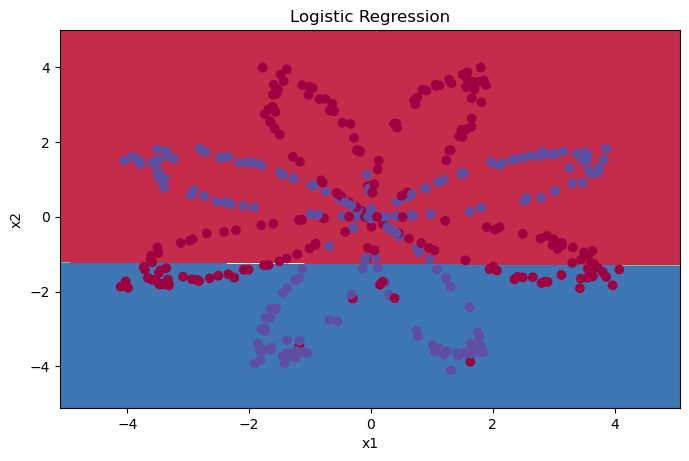

In [9]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), train_X, train_Y, "o")
plt.title("Logistic Regression")

In [10]:
print(f"Training accuracy: {100*clf.score(train_X.T, train_Y.ravel())}%")

Training accuracy: 54.25%


In [11]:
print(f"Test accuracy: {100*clf.score(test_X.T, test_Y.ravel())}%")

Test accuracy: 52.0%


# 3. Architecture of Simple Neural Network

Logistic regression does not work that well on the flower dataset. Next, we will train a Neural Network with a single hidden layer and see how that handles the same problem.

**The model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small $$



# 4. Helper functions

## 4.1 Activation functions

In [12]:
def sigmoid(x,derivative=False):
    s = 1/(1+np.exp(-x))
    if derivative == True:
        return s*(1-s)
    else:
        return s

In [13]:
def tanh(x,derivative=False):
    t = (np.exp(2*x)-1) / (np.exp(2*x)+1)
    if derivative == True:
        return 1 - t**2
    else:
        return t

Here is a visualization of the activation functions. Similarly for the two activation function is, that in the range $z \in [-1,1]$ the two functions behave almost like linear functions, while outside the range the non-linear behaviour takes place

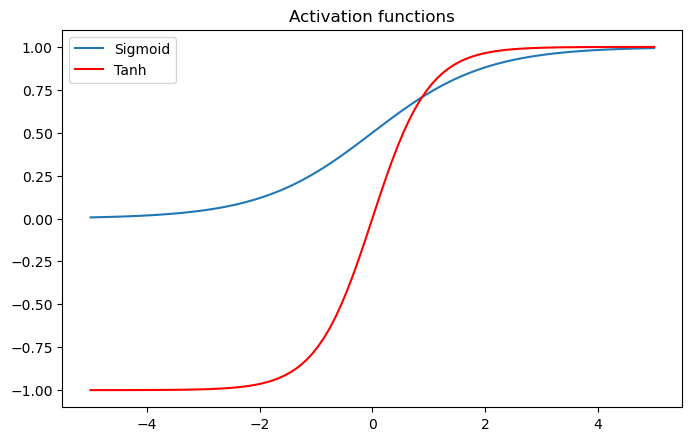

In [14]:
xx = np.linspace(-5,5,100)
plt.plot(xx, sigmoid(xx), label = "Sigmoid")
plt.plot(xx, tanh(xx), "r", label = "Tanh")
plt.legend()
plt.title("Activation functions")
plt.show()

## 4.2 Initialize parameters

In [15]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 

    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## 4.3 Forward propagation

In [16]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement Forward Propagation to calculate A2 (y_pred)
    Z1 = np.dot(W1,X)+b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## 4.4 Compute cost

In [17]:
def compute_cost(A_last, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """

    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A_last),Y) + np.multiply(np.log(1-A_last),1-Y)
    cost = - np.sum(logprobs)/m 

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect - e.g., turns [[17]] into 17
        
    return cost

## 4.5 Backward propagation

<img src="images/grad_summary.png" style="width:600px;height:300px;">

In [18]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - A1**2)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

## 4.6 Update parameters

In [19]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## 4.7 Predictions

In [20]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(float)
    
    return predictions

# 5. The model

In [21]:
def nn_model(X, Y, layersizes, learning_rate=1.5, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    n_x, n_h, n_y = layersizes 
    np.random.seed(3)
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # FORWARD PROPAGATION
        A_last, cache = forward_propagation(X, parameters)
        
        # CALCULATE COST
        cost = compute_cost(A_last, Y)
        costs.append(cost)
 
        # BACKPROPAGATION
        grads = backward_propagation(parameters, cache, X, Y)
 
        # UPDATE PARAMETERS
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters, costs

## 5.1 Train model

In [22]:
# Build a model with a n_h-dimensional hidden layer
parameters, costs = nn_model(train_X, train_Y, (2, 4, 1), learning_rate = 0.5, num_iterations = 5000, print_cost=True)

Cost after iteration 0: 0.693033
Cost after iteration 100: 0.569140
Cost after iteration 200: 0.285676
Cost after iteration 300: 0.235989
Cost after iteration 400: 0.220220
Cost after iteration 500: 0.212384
Cost after iteration 600: 0.207522
Cost after iteration 700: 0.204060
Cost after iteration 800: 0.201349
Cost after iteration 900: 0.199073
Cost after iteration 1000: 0.197061
Cost after iteration 1100: 0.195218
Cost after iteration 1200: 0.193489
Cost after iteration 1300: 0.191846
Cost after iteration 1400: 0.190281
Cost after iteration 1500: 0.188795
Cost after iteration 1600: 0.187392
Cost after iteration 1700: 0.186072
Cost after iteration 1800: 0.184838
Cost after iteration 1900: 0.183689
Cost after iteration 2000: 0.182629
Cost after iteration 2100: 0.181669
Cost after iteration 2200: 0.180811
Cost after iteration 2300: 0.180045
Cost after iteration 2400: 0.179349
Cost after iteration 2500: 0.178710
Cost after iteration 2600: 0.178117
Cost after iteration 2700: 0.177561
Cost

## 5.2 Plot train curve

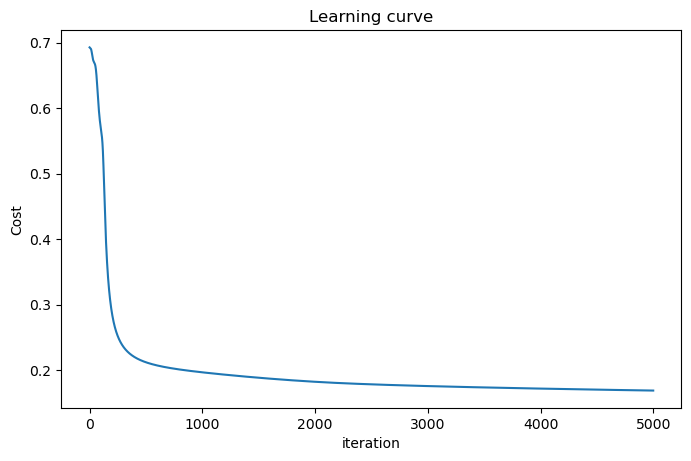

In [23]:
# Plot the learning curve
plt.plot(costs)
plt.title("Learning curve")
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

## Plot and accuracy of model

Training accuracy: 92.75%


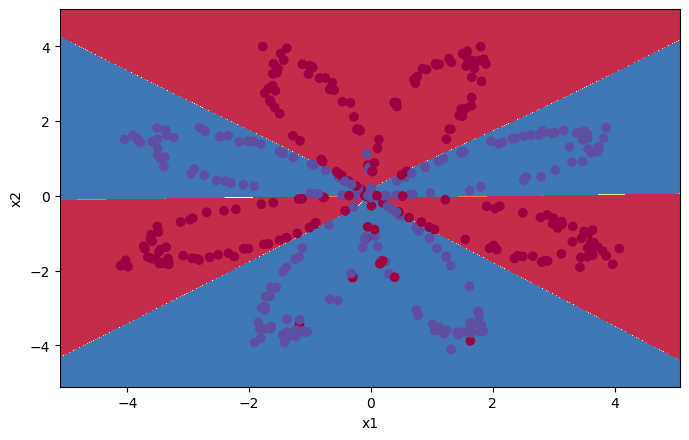

In [24]:
plot_decision_boundary(lambda x: predict(parameters, x.T), train_X, train_Y, "o")
acc = np.sum(predict(parameters, train_X)==train_Y)/train_Y.shape[1]*100
print("Training accuracy: {}%".format(acc))

Test accuracy: 87.0%


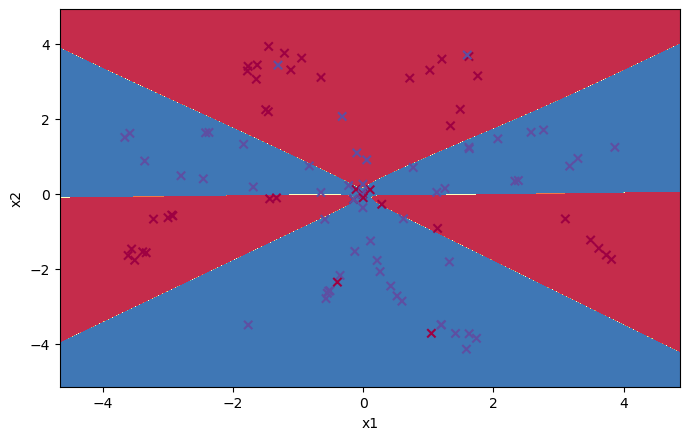

In [25]:
plot_decision_boundary(lambda x: predict(parameters, x.T), test_X, test_Y, "x")
acc = np.sum(predict(parameters, test_X)==test_Y)/test_Y.shape[1]*100
print("Test accuracy: {}%".format(acc))

# 6. Tuning hyperparameters

## 6.1 Tuning hidden layer size

Train accuracy for layer size 1: 69.0 %
Test accuracy for layer_size 1: 69.0 %
----
Train accuracy for layer size 2: 68.0 %
Test accuracy for layer_size 2: 62.0 %
----
Train accuracy for layer size 3: 93.25 %
Test accuracy for layer_size 3: 87.0 %
----
Train accuracy for layer size 4: 92.75 %
Test accuracy for layer_size 4: 87.0 %
----
Train accuracy for layer size 5: 92.75 %
Test accuracy for layer_size 5: 87.0 %
----
Train accuracy for layer size 10: 93.0 %
Test accuracy for layer_size 10: 87.0 %
----
Train accuracy for layer size 20: 92.75 %
Test accuracy for layer_size 20: 86.0 %
----
Train accuracy for layer size 30: 92.75 %
Test accuracy for layer_size 30: 86.0 %
----
Train accuracy for layer size 40: 92.75 %
Test accuracy for layer_size 40: 86.0 %
----
Train accuracy for layer size 50: 93.75 %
Test accuracy for layer_size 50: 86.0 %
----


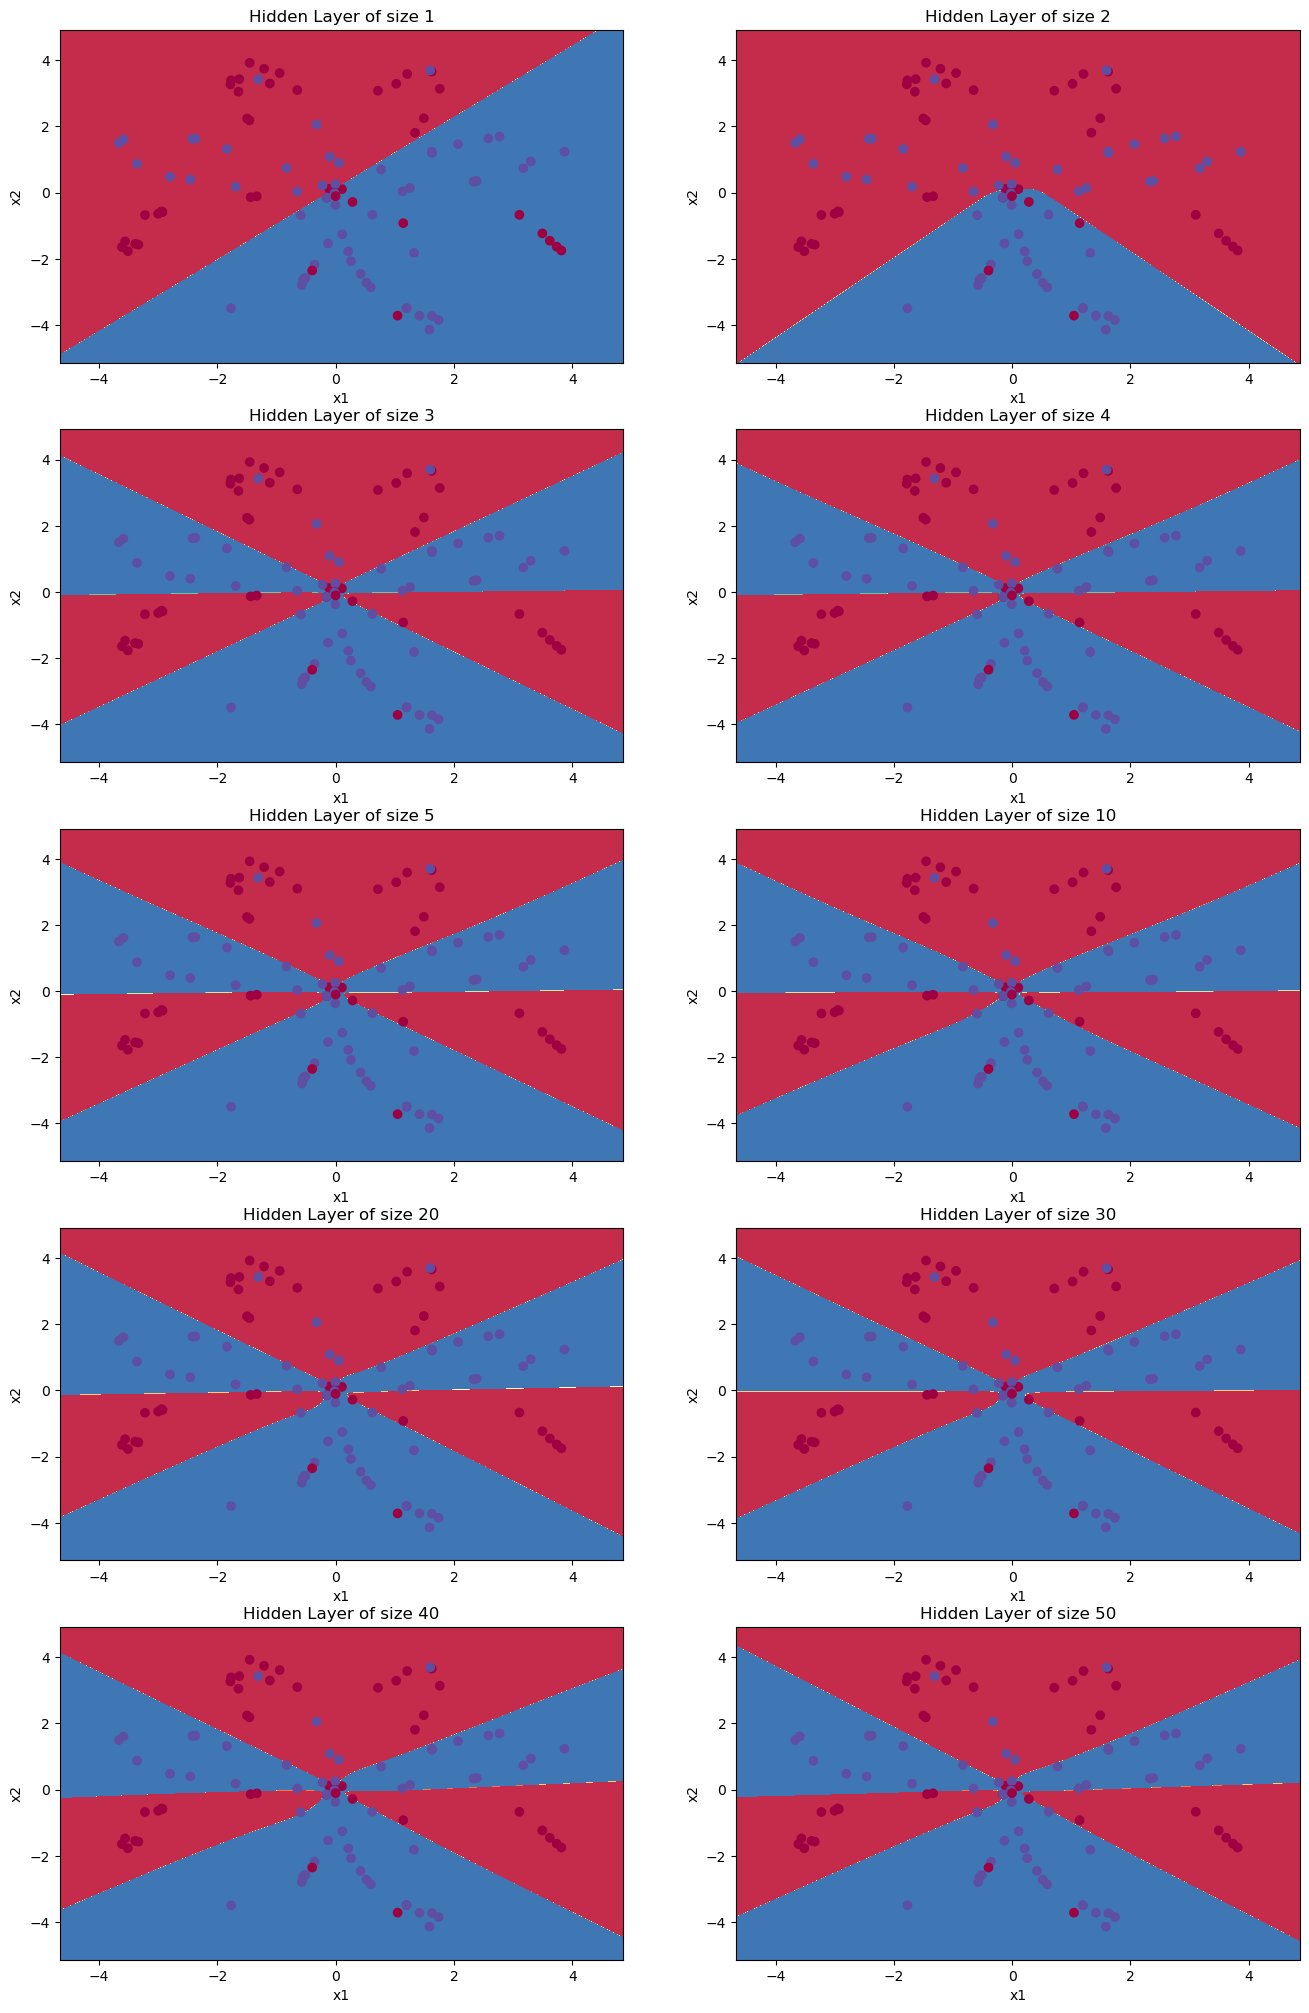

In [26]:
plt.figure(figsize=(16, 52))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(len(hidden_layer_sizes), 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h) 
    parameters, costs = nn_model(train_X, train_Y, (2, n_h, 1), 0.5, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), test_X, test_Y, "o")
    train_pred = predict(parameters, train_X)
    test_pred = predict(parameters, test_X)
    train_accuracy = float((np.dot(train_Y,train_pred.T) + np.dot(1 - train_Y, 1 - train_pred.T)) / float(train_Y.size)*100)
    test_accuracy = float((np.dot(test_Y,test_pred.T) + np.dot(1 - test_Y, 1 - test_pred.T)) / float(test_Y.size)*100)
    print ("Train accuracy for layer size {}: {} %".format(n_h, train_accuracy))
    print ("Test accuracy for layer_size {}: {} %".format(n_h, test_accuracy))
    print("----")

## 6.2 Tuning learning rate

Train accuracy for learning rate 0.01: 63.24999999999999 %
Test accuracy for learning rate 0.01: 63.0 %
----
Train accuracy for learning rate 0.05: 93.25 %
Test accuracy for learning rate 0.05: 85.0 %
----
Train accuracy for learning rate 0.1: 92.5 %
Test accuracy for learning rate 0.1: 86.0 %
----
Train accuracy for learning rate 0.5: 93.25 %
Test accuracy for learning rate 0.5: 87.0 %
----
Train accuracy for learning rate 1.0: 94.25 %
Test accuracy for learning rate 1.0: 87.0 %
----
Train accuracy for learning rate 1.5: 94.75 %
Test accuracy for learning rate 1.5: 87.0 %
----


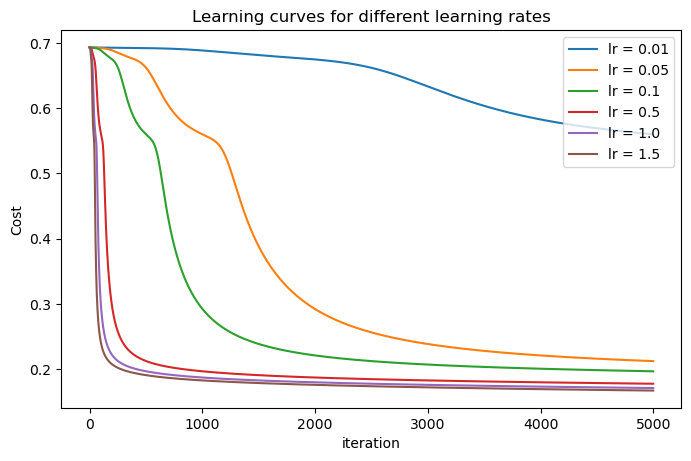

In [27]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5]
for i, lr in enumerate(learning_rates):
    parameters, costs = nn_model(train_X, train_Y, (2, 3, 1), learning_rate = lr, num_iterations = 5000)
    plt.plot(costs, label ="lr = " + str(lr))
    train_pred = predict(parameters, train_X)
    test_pred = predict(parameters, test_X)
    train_accuracy = float((np.dot(train_Y,train_pred.T) + np.dot(1 - train_Y, 1 - train_pred.T)) / float(train_Y.size)*100)
    test_accuracy = float((np.dot(test_Y,test_pred.T) + np.dot(1 - test_Y, 1 - test_pred.T)) / float(test_Y.size)*100)
    print ("Train accuracy for learning rate {}: {} %".format(lr, train_accuracy))
    print ("Test accuracy for learning rate {}: {} %".format(lr, test_accuracy))
    print("----")
plt.title('Learning curves for different learning rates')
plt.legend(loc = 1)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

# 7. Final model

In [28]:
# Build a model with a n_h-dimensional hidden layer
parameters, costs = nn_model(train_X, train_Y, (2, 3, 1), learning_rate = 1.5, num_iterations = 5000, print_cost=True)

Cost after iteration 0: 0.693121
Cost after iteration 100: 0.241341
Cost after iteration 200: 0.207668
Cost after iteration 300: 0.198942
Cost after iteration 400: 0.194282
Cost after iteration 500: 0.191145
Cost after iteration 600: 0.188810
Cost after iteration 700: 0.186969
Cost after iteration 800: 0.185459
Cost after iteration 900: 0.184183
Cost after iteration 1000: 0.183077
Cost after iteration 1100: 0.182102
Cost after iteration 1200: 0.181228
Cost after iteration 1300: 0.180435
Cost after iteration 1400: 0.179709
Cost after iteration 1500: 0.179039
Cost after iteration 1600: 0.178416
Cost after iteration 1700: 0.177834
Cost after iteration 1800: 0.177286
Cost after iteration 1900: 0.176771
Cost after iteration 2000: 0.176282
Cost after iteration 2100: 0.175818
Cost after iteration 2200: 0.175377
Cost after iteration 2300: 0.174955
Cost after iteration 2400: 0.174552
Cost after iteration 2500: 0.174165
Cost after iteration 2600: 0.173794
Cost after iteration 2700: 0.173436
Cost

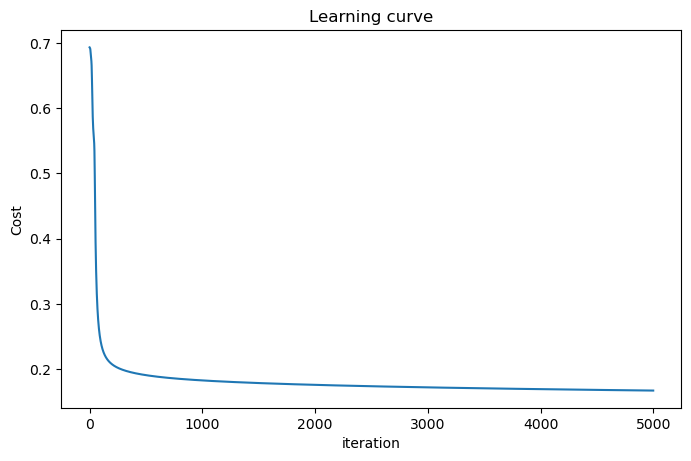

In [29]:
# Learning curve
plt.plot(costs)
plt.title("Learning curve")
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

## Plot and accuracy of model

Training accuracy: 94.75%


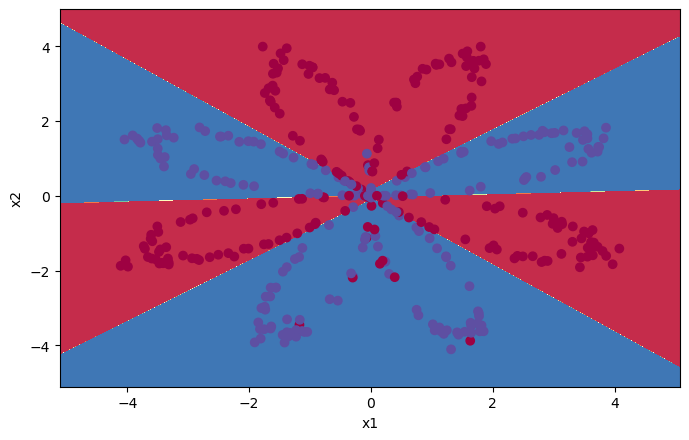

In [30]:
plot_decision_boundary(lambda x: predict(parameters, x.T), train_X, train_Y, "o")
acc = np.sum(predict(parameters, train_X)==train_Y)/train_Y.shape[1]*100
print("Training accuracy: {}%".format(acc))

Test accuracy: 87.0%


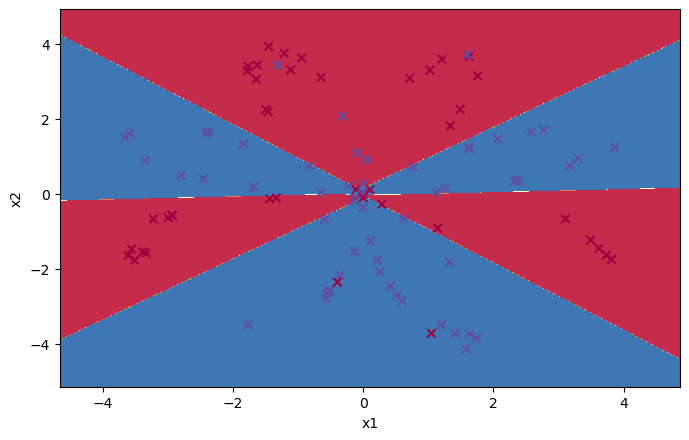

In [31]:
plot_decision_boundary(lambda x: predict(parameters, x.T), test_X, test_Y, "x")
acc = np.sum(predict(parameters, test_X)==test_Y)/test_Y.shape[1]*100
print("Test accuracy: {}%".format(acc))